### Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import de données 

In [2]:
#Import de la table erp
erp=pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P5_Kus_Serhat V\erp.csv',sep=";")
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


Définition d'une fonction "testcle" pour permettre de vérifier si une clé peut être utilisé comme clé primaire

In [3]:
def testcle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe, et peut donc être utiliser comme clé primaire")
    else :
        print("La clé est présente plusieurs fois dans le dataframe, et ne peut donc pas être utiliser comme clé primaire")
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

In [4]:
testcle(erp, "product_id")

La clé n'est pas présente plusieurs fois dans le dataframe, et peut donc être utiliser comme clé primaire
Le dataframe est de la forme : (825, 5) (lignes, colonnes)


On vérifie maintenant si il y'a des nulls dans la dataframe erp

In [5]:
#voir si il y a des valeurs manquantes
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [6]:
#Import de la table liaison
liaison=pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P5_Kus_Serhat V\liaison.csv',sep=";")
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


On veut vérifier ici si il y'a des doublons et des Nan pour vérifier l'unicité de la colonne

In [7]:
testcle(liaison, 'product_id')

La clé n'est pas présente plusieurs fois dans le dataframe, et peut donc être utiliser comme clé primaire
Le dataframe est de la forme : (825, 2) (lignes, colonnes)


In [8]:
testcle(liaison,'id_web')

La clé est présente plusieurs fois dans le dataframe, et ne peut donc pas être utiliser comme clé primaire
Le dataframe est de la forme : (825, 2) (lignes, colonnes)


In [9]:
#Valeurs manquantes (Nan)
print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


In [10]:
#Import de la table web
web=pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P5_Kus_Serhat V\web.csv',sep=";")
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Ici je renomme la colonne 'sku' en 'id_web' car ce sont en fait la même colonne comme le dit Sylvie

In [11]:
web.rename(columns={'sku':'id_web'}, inplace=True)

In [12]:
testcle(web,'id_web')

La clé est présente plusieurs fois dans le dataframe, et ne peut donc pas être utiliser comme clé primaire
Le dataframe est de la forme : (1513, 28) (lignes, colonnes)


On a détécté que id_web n'est pas primaire donc c'est peut-être lié aux nulls, on va étudier les nulls dans cette colonne.

On a trouvé 85 valeurs manquantes dans id_web

In [13]:
#Valeurs manquantes de sku (Nan)
sku_null=web[web['id_web'].isnull()]
sku_null.shape
sku_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_web                 0 non-null      object 
 1   virtual                85 non-null     int64  
 2   downloadable           85 non-null     int64  
 3   rating_count           85 non-null     int64  
 4   average_rating         2 non-null      float64
 5   total_sales            2 non-null      float64
 6   tax_status             2 non-null      object 
 7   tax_class              0 non-null      float64
 8   post_author            2 non-null      float64
 9   post_date              2 non-null      object 
 10  post_date_gmt          2 non-null      object 
 11  post_content           0 non-null      float64
 12  post_title             2 non-null      object 
 13  post_excerpt           2 non-null      object 
 14  post_status            2 non-null      object 
 15  comme

On va observer de près ces 85 lignes, on remarque qu'il y'a 2 lignes pour lesquelles plusieurs colonnes sont renseignés, on va regardé de près ces 2 lignes

Pour ces deux lignes,on remarque qu'il y'a 6 colonnes qui contiennent des Nan.

Finalement ces deux lignes représentent des veéritables produits mais n'ont pas d'id_web.

Je vais me rapprocher auprès de mes collègues pour savoir pourquoi ils ont des id_web null.

Ici je vais supprimer tous les Nan

In [14]:
deux_lignes=sku_null[sku_null['average_rating'].notnull()]
deux_lignes

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [15]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_web                 1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

Ici on a 1513 lignes avec les nulls

In [16]:
#Suppression des Nan (1513-1428=85)
web.dropna(subset=["id_web"],how="any",inplace=True)

In [17]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_web                 1428 non-null   object 
 1   virtual                1428 non-null   int64  
 2   downloadable           1428 non-null   int64  
 3   rating_count           1428 non-null   int64  
 4   average_rating         1428 non-null   float64
 5   total_sales            1428 non-null   float64
 6   tax_status             714 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1428 non-null   float64
 9   post_date              1428 non-null   object 
 10  post_date_gmt          1428 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1428 non-null   object 
 13  post_excerpt           714 non-null    object 
 14  post_status            1428 non-null   object 
 15  comm

Ici on a 1428 lignes après la suppression des nulls

In [18]:
#Suppression des doublons
web=web.drop_duplicates(subset=['id_web'])

In [19]:
testcle(web,'id_web')

La clé n'est pas présente plusieurs fois dans le dataframe, et peut donc être utiliser comme clé primaire
Le dataframe est de la forme : (714, 28) (lignes, colonnes)


Après suppression des doublons, on obtient donc 714 lignes pour 28 colonnes et on peut finalement utilisé l'id web en tant que clé primaire

#### Jointures des tables

In [20]:
erp_liaison_outer = pd.merge(erp,liaison, on='product_id', how='outer',indicator=True)
erp_liaison_outer['_merge'].unique()

['both']
Categories (1, object): ['both']

In [21]:
erp_liaison_right = pd.merge(erp,liaison, on='product_id', how='right',indicator=True)
erp_liaison_right['_merge'].unique()

['both']
Categories (1, object): ['both']

In [22]:
erp_liaison_left = pd.merge(erp,liaison, on='product_id', how='left',indicator=True)
erp_liaison_left['_merge'].unique()

['both']
Categories (1, object): ['both']

In [23]:
erp_liaison_inner = pd.merge(erp,liaison, on='product_id', how='inner',indicator=True)
erp_liaison_inner['_merge'].unique()

['both']
Categories (1, object): ['both']

In [24]:
erp_liaison = pd.merge(erp,liaison, on='product_id',how = 'inner')

Ici on peut voir que pour tous les types de jointures il y'a bien match

In [25]:
erp_web_left = pd.merge(web, erp_liaison, on='id_web',how='left',indicator=True)  
erp_web_left['_merge'].unique()

['both']
Categories (1, object): ['both']

In [26]:
erp_web_right = pd.merge(web, erp_liaison, on='id_web',how='right',indicator=True)  
erp_web_right['_merge'].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [27]:
erp_web_outer = pd.merge(web, erp_liaison, on='id_web',how='outer',indicator=True)  
erp_web_outer['_merge'].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [28]:
erp_web_inner = pd.merge(web, erp_liaison, on='id_web',how='inner',indicator=True)  
erp_web_inner['_merge'].unique()

['both']
Categories (1, object): ['both']

In [29]:
erp_web = pd.merge(web, erp_liaison, on='id_web',how='inner') 

Ici on choisi donc la jointure inner car c'est celle qui marche le mieux

In [30]:
erp_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock


### Calculs du CA par produits et total

In [31]:
erp_web['CA par produits'] = erp_web['price']*erp_web['total_sales']
erp_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA par produits
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,0.0,product,NaN,0.0,4954,1,25.0,0,instock,250.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock,145.2
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock,42.3


In [32]:
ca_total = erp_web['CA par produits'].sum()
print("Le chiffre d affaire réalisé en ligne est de ", ca_total)

Le chiffre d affaire réalisé en ligne est de  70568.6


### Détection des outliers

Liste des prix des produits dans l'ordre croissant

In [33]:
price = erp_web['price']
price = sorted(price)

Calcul de la moyenne

In [34]:
moy = sum(price)/len(price)
moy

32.493137254901946

Calcul de la médiane

In [35]:
med = np.percentile(price,[50])
print(med)

[23.55]


On calcul ici les quartiles (q1 et q3) pour pouvoir calculer l'interquartile

In [36]:
q1,q3 = np.percentile(price,[25,75])
q1,q3

(14.1, 42.175000000000004)

Calcul de l'interquatile

In [37]:
interq = q3-q1
interq

28.075000000000003

Calcul de la valeur minimum

In [38]:
val_min = min(price)
val_min

5.2

Calcul de la valeur maximum

In [39]:
val_max = max(price)
val_max

225.0

Calcul de la borne inférieur

In [40]:
lower_bound = q1 - (1.5 * interq)
lower_bound

-28.012500000000003

Calcul de la borne supérieur

In [41]:
upper_bound = q3 + (1.5 * interq)
upper_bound

84.28750000000001

Calcul des outliers

In [42]:
outliers = [x for x in price if x <= lower_bound or x >= upper_bound]
print(outliers)
print("Il y a ", len(outliers),"valeurs atypiques ")

[85.6, 86.8, 88.4, 92.0, 93.0, 99.0, 100.0, 102.3, 104.0, 105.0, 105.0, 105.6, 108.5, 109.6, 112.0, 114.0, 115.0, 115.0, 116.4, 121.0, 121.0, 122.0, 124.8, 126.5, 135.0, 137.0, 157.0, 175.0, 176.0, 191.3, 217.5, 225.0]
Il y a  32 valeurs atypiques 


{'whiskers': [<matplotlib.lines.Line2D at 0x1109ebfd490>,
 'caps': [<matplotlib.lines.Line2D at 0x1109ebfdb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1109ebfd130>],
 'medians': [<matplotlib.lines.Line2D at 0x1109ec0b250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1109ec0b5b0>],
 'means': []}

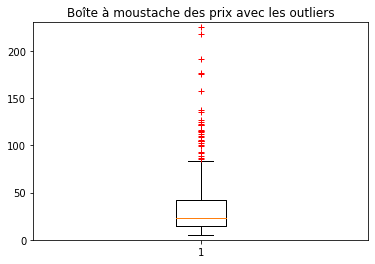

In [43]:
plt.ylim(0,230)
plt.title("Boîte à moustache des prix avec les outliers")
plt.boxplot(price, sym='r+')

Les outliers sont donc les "+" affichés en rouge, on peut voir que tous les outliers sont situés au dessus de la borne supérieur.

Tous les outliers sont au dessus de 85 qui est la borne supérieur.

Le minimum est donc de 5 environ comme on peut le voir sur le graphique.

Sur le graphique on peut voir que la médiane est d'environ 20.

Les données de ce graphique à moustache montre bien les valeurs des calculs précédemment effectués.

Les points rouges représentent les outliers qui sont des valeurs atypiques et non aberrantes, ce sont donc des valeurs au dessus de la normale : ils sont juste "plus chère".

On ne peut donc pas les supprimer.